# **CÁC THỦ TỤC CẦN THIẾT TRƯỚC KHI CHẠY THỬ**

- Author: Phạm Bùi Nhật Huy
- Mục đích:
  + Rút trích thông tin về Màu sắc và Cạnh của hình
  + Đo lường Histogram dựa trên Màu sắc và Cạnh của hình ảnh
  + Sử dụng thông tin Histogram phục vụ cho việc tính toán độ tương đồng Cosin

### **KẾT NỐI GGDRIVE**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


### **IMPORT THƯ VIỆN**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow
import os

### **SHOW IMAGE**

In [2]:
from scipy.ndimage import interpolation
import cv2

def showimage(img_src, title):
  plt.figure(figsize=(40, 40))

  # show img src
  plt.subplot(1, 2, 1)
  plt.title(title)
  img_src = cv2.cvtColor(img_src.astype(np.uint8), cv2.COLOR_BGR2RGB)
  plt.imshow(img_src, interpolation='bicubic')

### **SHOW 2 IMAGE**

In [ ]:
from scipy.ndimage import interpolation
import cv2

def show2image(img_src, img_rst, title1, title2):
  plt.figure(figsize=(20, 20))

  # show img src
  plt.subplot(1, 2, 1)
  plt.title(title1)
  img_src = cv2.cvtColor(img_src.astype(np.uint8), cv2.COLOR_BGR2RGB)
  plt.imshow(img_src, interpolation='bicubic')

  # show img result
  plt.subplot(1, 2, 2)
  plt.title(title2)
  img_rst = cv2.cvtColor(img_rst.astype(np.uint8), cv2.COLOR_BGR2RGB)
  plt.imshow(img_rst, interpolation='bicubic')

### **HÀM ĐỌC ẢNH**

In [14]:
def readimage (dir_image, name_image, mode = cv2.IMREAD_COLOR):
  import cv2 as cv
  path_filename = os.path.join(dir_image, name_image)
  img = cv.imread(path_filename, mode)
  return img

### **SOBEL FILTER**

In [ ]:
from scipy import ndimage

def sobel_filters(img):
  Sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
  Sy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)

  Ix = cv.filter2D(img, -1, Sx)
  Iy = cv.filter2D(img, -1, Sy)

  G = np.hypot(Ix, Iy)
  G = G / G.max() * 255
  theta = np.arctan2(Iy, Ix)

  return Ix, Iy, G, theta

### **CACULATE FEARTURE VECTOR**

In [ ]:
def calFeatureVector(img):
  img_ = cv.resize(img, (800, 1300))
  _, _, G, _ = sobel_filters(img_)
  row_sum = np.sum(G, axis=1, dtype=np.float64)
  col_sum = np.sum(G, axis=0, dtype=np.float64)
  return (np.hstack((row_sum.T, col_sum)))

### **HÀM TÍNH HIST ẢNH MÀU**

In [ ]:
def calcHistColorImg(pathfilename):
  img = cv.imread(pathfilename)
  hist = cv.calcHist([img], [0, 1, 2], None,
                     [8, 8, 8], [0, 256, 0, 256, 0, 256])
  size = img.shape[0] * img.shape[1] * img.shape[2]
  hist = hist / size
  return hist

# **TEST DỰA TRÊN TÍNH CHẤT CẠNH**

## **ĐƯỜNG DẪN CẦN THIẾT**

In [ ]:
import os

dir_sour = '/gdrive/MyDrive/Đồ án/'
dir_proj = os.path.join(dir_sour, 
                        'Đồ án Nhập môn Thị giác máy tính (CS231.M22.KHCL)')
dir_dataset = os.path.join(dir_proj,
                           'Dataset',
                           'Fashion Product Image Dataset',
                           'images')

## **ĐỌC ẢNH**

In [ ]:
img1 = readimage(dir_dataset, '1670.jpg')

In [ ]:
img2 = readimage(dir_dataset, '1531.jpg')

## **TRÍCH XUẤT CẠNH CỦA ẢNH**

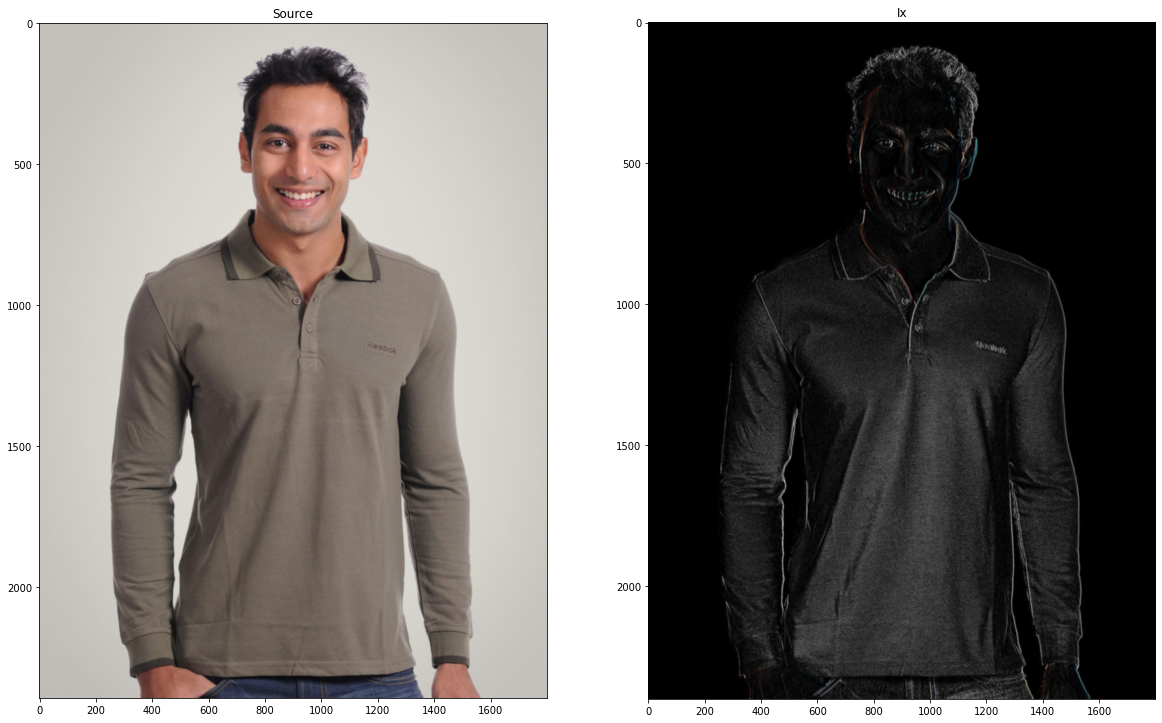

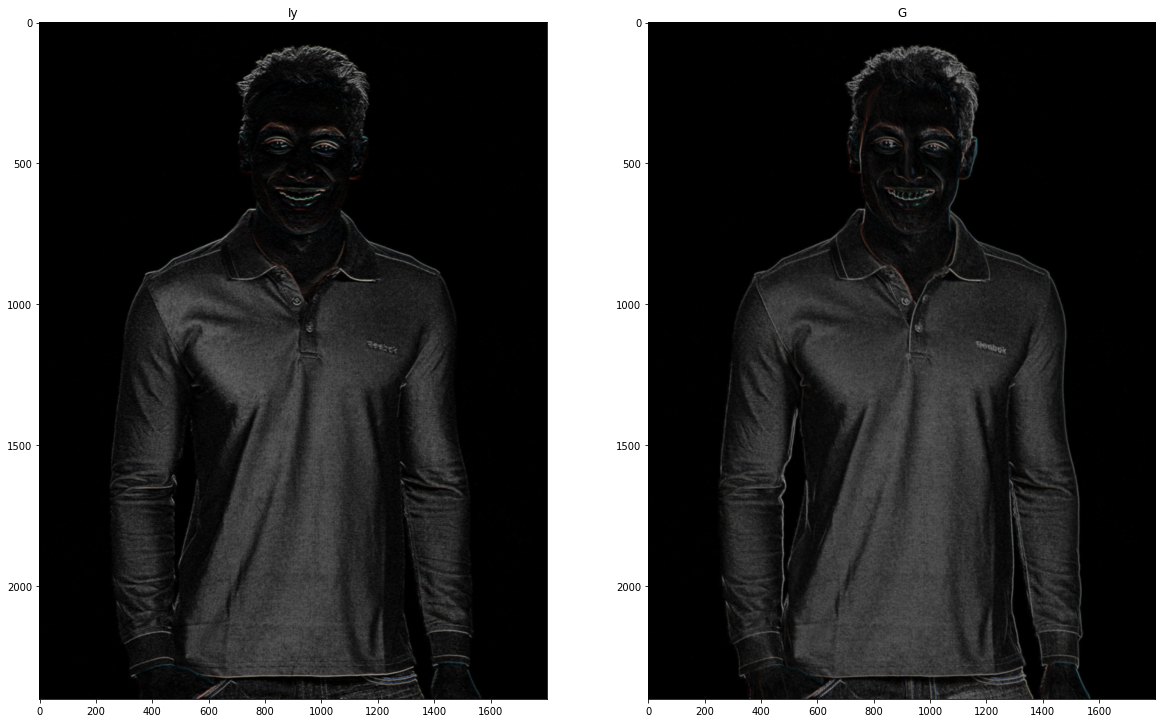

In [ ]:
Ix, Iy, G, theta = sobel_filters(img1)
img1 = img1[:-4]
show2image(img1, Ix, 'Source', 'Ix')
show2image(Iy, G, 'Iy', 'G')

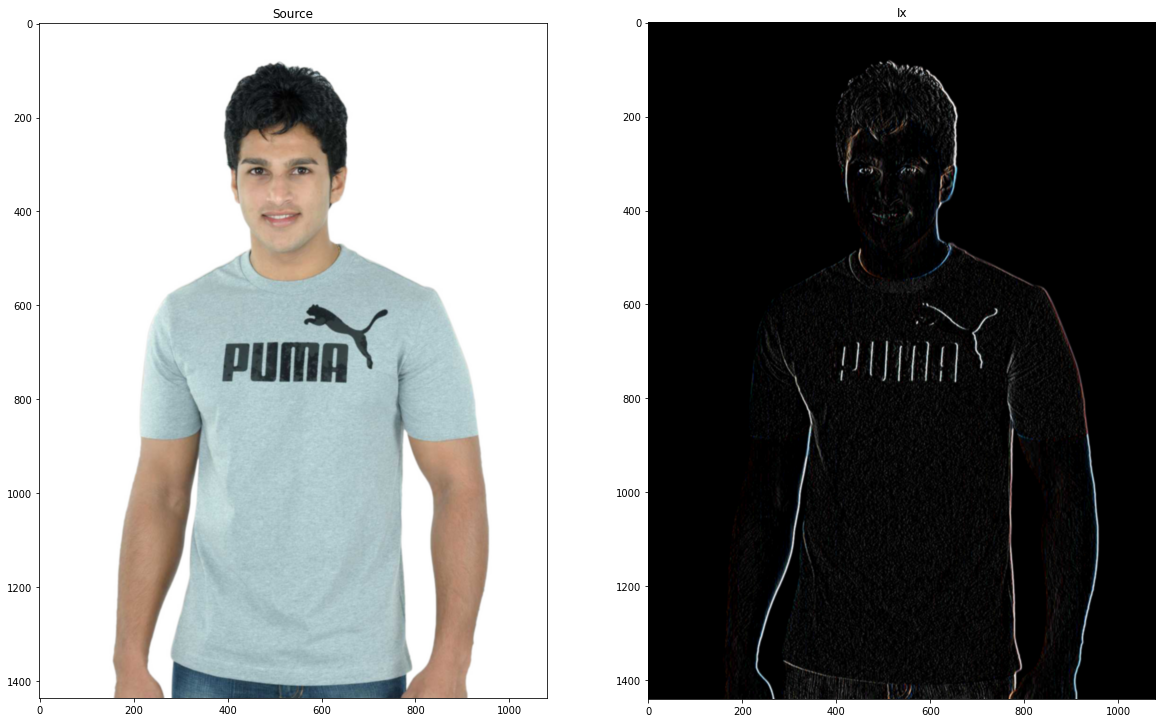

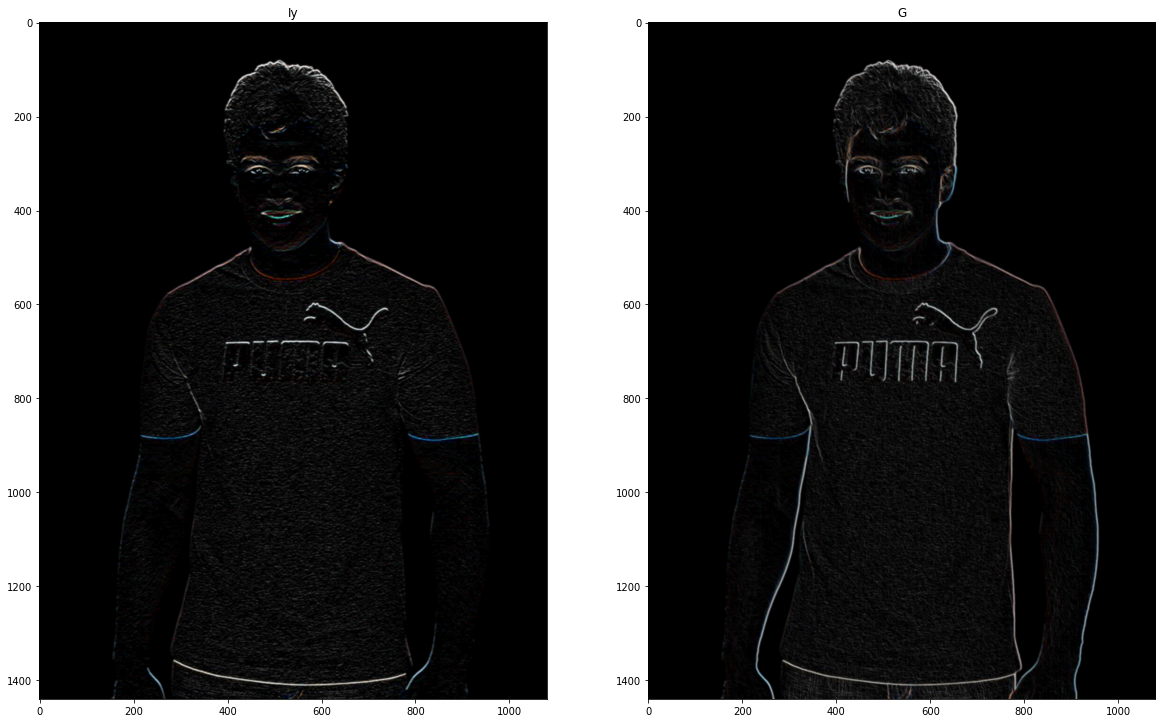

In [ ]:
Ix, Iy, G, theta = sobel_filters(img2)
img2 = img2[:-4]
show2image(img2, Ix, 'Source', 'Ix')
show2image(Iy, G, 'Iy', 'G')

## **TÍNH ĐỘ TƯƠNG ĐỒNG DỰA TRÊN CẠNH**

In [ ]:
img1_1 = img1[:, :, 0]
img1_2 = img1[:, :, 1]
img1_3 = img1[:, :, 2]

img2_1 = img2[:, :, 0]
img2_2 = img2[:, :, 1]
img2_3 = img2[:, :, 2]

In [ ]:
featureImg1_1 = calFeatureVector(img1_1)
featureImg1_2 = calFeatureVector(img1_2)
featureImg1_3 = calFeatureVector(img1_3)

In [ ]:
featureImg2_1 = calFeatureVector(img2_1)
featureImg2_2 = calFeatureVector(img2_2)
featureImg2_3 = calFeatureVector(img2_3)

In [ ]:
from scipy.spatial import distance

dist_Img1_1_Img2_1 = distance.euclidean(featureImg1_1, featureImg2_1)
dist_Img1_2_Img2_2 = distance.euclidean(featureImg1_2, featureImg2_2)
dist_Img1_3_Img2_3 = distance.euclidean(featureImg1_3, featureImg2_3)

print('Euclidean distance between 1670.jpg and 1531.jpg: ', 
      (dist_Img1_1_Img2_1 + dist_Img1_1_Img2_1 + dist_Img1_1_Img2_1) / 3)

Euclidean distance between 1670.jpg and 1531.jpg:  228707.3247138893


In [ ]:
print('Cosine similarity between 1670.jpg and 1531.jpg: ',
      (1 - distance.cosine(featureImg1_1, featureImg2_1) +
       1 - distance.cosine(featureImg1_2, featureImg2_2) +
       1 - distance.cosine(featureImg1_3, featureImg2_3)) / 3)

Cosine similarity between 1670.jpg and 1531.jpg:  0.9142738723166581


In [ ]:
print(dist_Img1_1_Img2_1)
print(dist_Img1_2_Img2_2)
print(dist_Img1_3_Img2_3)

228707.3247138893
232768.37419914565
232968.23745587133


In [ ]:
print(1 - distance.cosine(featureImg1_1, featureImg2_1))
print(1 - distance.cosine(featureImg1_2, featureImg2_2))
print(1 - distance.cosine(featureImg1_3, featureImg2_3))

0.9143203509009252
0.9125100171810189
0.9159912488680302


In [ ]:
cosineEdge = (( 1 - distance.cosine(featureImg1_1, featureImg2_1) +
                1 - distance.cosine(featureImg1_2, featureImg2_2) +
                1 - distance.cosine(featureImg1_3, featureImg2_3)) / 3)

# **TEST DỰA TRÊN TÍNH CHẤT MÀU (HISTOGRAM)**

In [ ]:
Hist1 = calcHistColorImg(dir_dataset + '/1670.jpg')
Hist2 = calcHistColorImg(dir_dataset + '/1531.jpg')

In [ ]:
Hist1 = Hist1.reshape(Hist1.flatten().shape[0])
Hist2 = Hist2.reshape(Hist2.flatten().shape[0])

In [ ]:
from scipy.spatial import distance

dist_Img1_Img2 = distance.euclidean(Hist1, Hist2)

print('Euclidean distance between 1670.jpg and 1531.jpg: ', dist_Img1_Img2)

Euclidean distance between 1670.jpg and 1531.jpg:  0.24272638090257143


In [ ]:
print('Cosine similarity between 1670.jpg and 1531.jpg: ',
      1 - distance.cosine(Hist1, Hist2))

Cosine similarity between 1670.jpg and 1531.jpg:  0.02448334393561602


In [ ]:
cosineHist = 1 - distance.cosine(Hist1, Hist2)

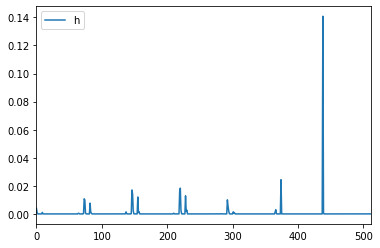

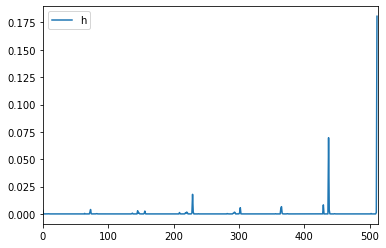

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Hist1)
plt.xlim([0, 512])
plt.legend(('histogam'), loc = 'upper left')
plt.show()

plt.plot(Hist2)
plt.xlim([0, 512])
plt.legend(('histogam'), loc = 'upper left')
plt.show()

# **TỔNG HỢP KẾT QUẢ COSINE CUỐI CÙNG**

In [ ]:
cosineResult = (cosineEdge + cosineHist) / 2
print(cosineResult)

0.4693786081261371


# **THỬ CÂN BẰNG HISTOGRAM**

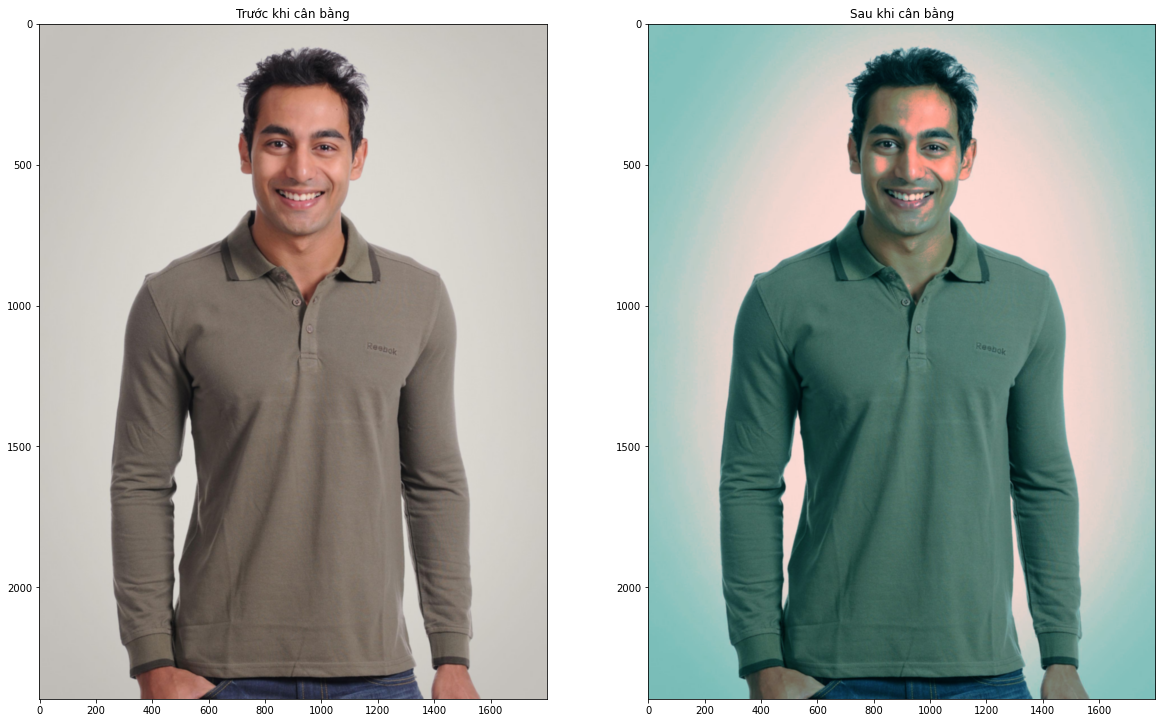

In [ ]:
img_test = img1.copy()
#img_test[:, :, 0] = cv.equalizeHist(img1[:, :, 0])
#img_test[:, :, 1] = cv.equalizeHist(img1[:, :, 1])
img_test[:, :, 2] = cv.equalizeHist(img1[:, :, 2])

show2image(img1, img_test, "Trước khi cân bằng", "Sau khi cân bằng")
#cv2_imshow(img_babyequal)

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
files.upload()

Saving —Pngtree—vector restaurant menu_1834288.png to —Pngtree—vector restaurant menu_1834288.png


{'—Pngtree—vector restaurant menu_1834288.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\xb0\x00\x00\x04\xb0\x08\x06\x00\x00\x00\xeb!\xb3\xcf\x00\x00\x00\tpHYs\x00\x00.#\x00\x00.#\x01x\xa5?v\x00\x00\nMiCCPPhotoshop ICC profile\x00\x00x\xda\x9dSwX\x93\xf7\x16>\xdf\xf7e\x0fVB\xd8\xf0\xb1\x97l\x81\x00"#\xac\x08\xc8\x10Y\xa2\x10\x92\x00a\x84\x10\x12@\xc5\x85\x88\nV\x14\x15\x11\x9cHU\xc4\x82\xd5\nH\x9d\x88\xe2\xa0(\xb8gA\x8a\x88Z\x8bU\\8\xee\x1f\xdc\xa7\xb5}z\xef\xed\xed\xfb\xd7\xfb\xbc\xe7\x9c\xe7\xfc\xcey\xcf\x0f\x80\x11\x12&\x91\xe6\xa2j\x009R\x85<:\xd8\x1f\x8fOH\xc4\xc9\xbd\x80\x02\x15H\xe0\x04 \x10\xe6\xcb\xc2g\x05\xc5\x00\x00\xf0\x03yx~t\xb0?\xfc\x01\xafo\x00\x02\x00p\xd5.$\x12\xc7\xe1\xff\x83\xbaP&W\x00 \x91\x00\xe0"\x12\xe7\x0b\x01\x90R\x00\xc8.T\xc8\x14\x00\xc8\x18\x00\xb0S\xb3d\n\x00\x94\x00\x00ly|B"\x00\xaa\r\x00\xec\xf4I>\x05\x00\xd8\xa9\x93\xdc\x17\x00\xd8\xa2\x1c\xa9\x08\x00\x8d\x01\x00\x99(G$\x02@\xbb\x00`U\x81R,\x02\xc0\xc2\x00\xa0\xac@".\x04\xc0\xae\x01\x80Y\xb62G\

In [ ]:
import shutil
shutil.copy("/content/—Pngtree—vector restaurant menu_1834288.png", "/gdrive/MyDrive/Đồ án")

'/gdrive/MyDrive/Đồ án/—Pngtree—vector restaurant menu_1834288.png'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving —Pngtree—vector restaurant menu_1834288.png to —Pngtree—vector restaurant menu_1834288 (1).png


In [ ]:
files.view('/gdrive/MyDrive')

<IPython.core.display.Javascript object>

In [ ]:
x = []
for fn in uploaded.keys():
  x.append(fn)
print(x)

['—Pngtree—vector restaurant menu_1834288.png']


In [4]:
from google.colab import files
uploaded = files.upload()

Saving 286021480_528886635597253_8885647126945859861_n.jpg to 286021480_528886635597253_8885647126945859861_n.jpg


In [15]:
img = readimage('/content', '286021480_528886635597253_8885647126945859861_n.jpg', mode=cv2.IMREAD_GRAYSCALE)

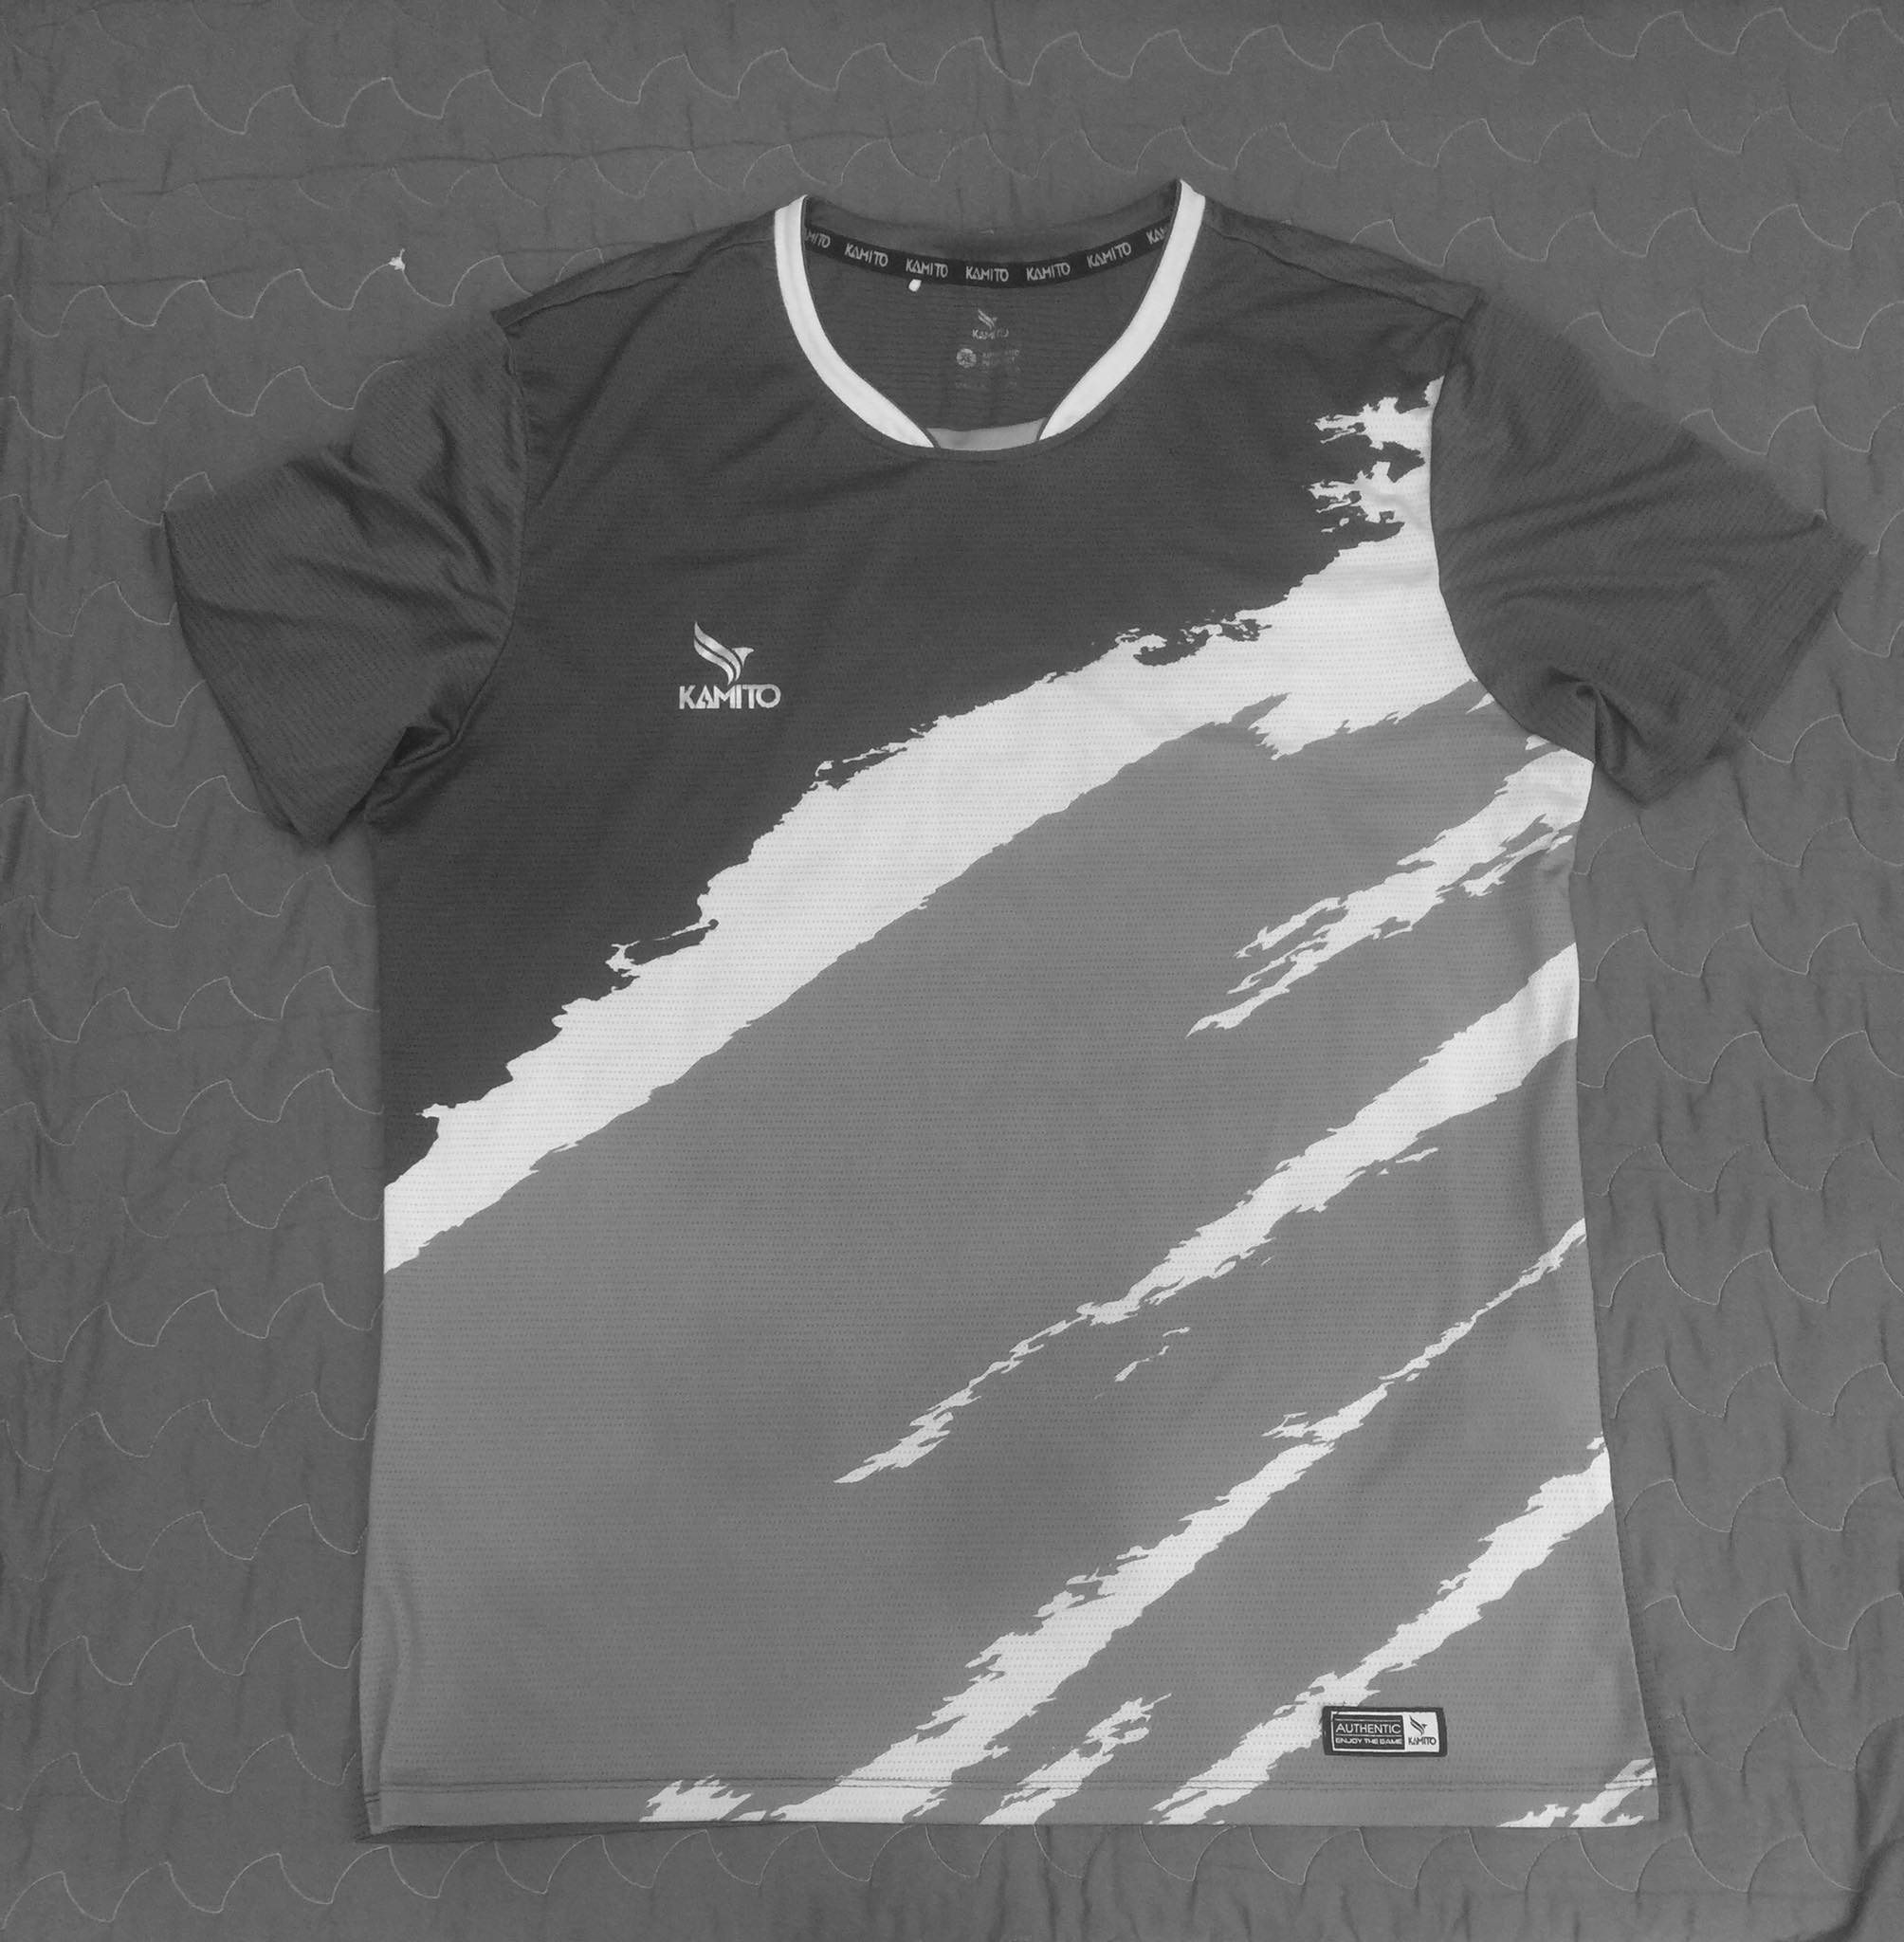

In [16]:
cv2_imshow(img)